Navn på gruppemedlemmer: David Omanovic, Isak Ånonli, Sebastian Siljuholtet Johansen
### &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;TMA4320 vår 2023 - Biofysikkprosjekt
## Diffusjonsvektet MRI: et bilde av vannmolekylers virrevandring

Diffusjon og brownske bevegelser modelleres ved implementasjon av Python kode. I koden benyttes numeriske metoder for å simulere enkel en og to dimensjonal virrevandrer med en simpel algoritme. Videre ser vi på diffusjon av vannmolekyler i hjernen. Simuleringene våres skal gi en best mulig beskrivelse av diffusjon i vev. Videre utføres enkel bildeanalyse av et intesitetsbilde som implementeres med Sobel-filteret.


I utgangspunktet defineres endring i posisjon og tid som dimensjonsløse størrelser, altså $\Delta x, \Delta t = 1 $. Vi antar at $\varphi(x,t)$ er sannsynlighetstettheten til en normalfordeling med null forventningsverdi $\mu = 0$ og varians $\sigma^2 = at$. Dette vil da løse diffusjonslikningen 

\begin{equation}
\frac{\partial \varphi (x,t)}{\partial t} = D \frac{\partial^2 \varphi}{\partial x^2} \; \; \; \; \; \; \; \; \; (1)
\end{equation}

Dette gjelder dersom $a$ velges riktig. Vi kan bevise dette ved å substituere funksjonen for denne sannsynlighetstettheten $\varphi$ inn i diffusjonslikningen

**Bevis: oppgave 1 a)**

Sannsynlighetstettheten utifra antakelsene vil være lik
\begin{equation}
\varphi (x,t) = \frac{1}{\sqrt{(2\pi at)}} exp(-\frac12 \frac{x^2}{at})
\end{equation}

Minnes på om at diffusjonskonstantet $D$ er definert som
\begin{equation}
D = \frac{(\Delta x)^2}{2 \Delta t}
\end{equation}
så med $\Delta x, \Delta t = 1$ så får vi $D = 1/2$

Da er det bare å substituere denne potensielle løsningen til den partielle differensiallikningen for å verifisere

\begin{equation}
\frac{\partial \varphi (x,t)}{\partial t} = D \frac{\partial^2 \varphi}{\partial x^2}
\end{equation}

\begin{equation}
\frac{d}{dt}\left(\frac{1}{\sqrt{2\pi \:at}}\cdot \:e^{-\frac{1}{2}\left(\frac{x^2}{at}\right)}\right)\:=\:\frac{1}{2}\:\frac{d}{dx}\left(\frac{d}{dx}\left(\left(\frac{1}{\sqrt{2\pi \:\:at}}\cdot \:\:e^{-\frac{1}{2}\left(\frac{x^2}{at}\right)}\right)\right)\right)
\end{equation}

\begin{equation}
\frac{d}{dt}\left(\frac{1}{\sqrt{2\pi at}}e^{-\frac{1}{2}\left(\frac{x^2}{at}\right)}\right)=\frac{e^{-\frac{x^2}{2at}}\left(x^2-at\right)}{2\sqrt{2}\sqrt{\pi }a^{\frac{3}{2}}t^{\frac{5}{2}}}
\end{equation}

\begin{equation}
\frac 12 \frac{d^2}{dx^2}\left(\frac{1}{\sqrt{2\pi at}}e^{-\frac{1}{2}\left(\frac{x^2}{at}\right)}\right)=-\frac 12\frac{-x^2+at}{\sqrt{2}a^2e^{\frac{x^2}{2at}}t^2\sqrt{\pi at}} = \frac{e^{-\frac{x^2}{2at}}\left(x^2-at\right)}{2\sqrt{2}\sqrt{\pi }a^{\frac{5}{2}}t^{\frac{5}{2}}}
\end{equation}

\begin{equation}
\rightarrow a^{5/2} = a^{3/2} \rightarrow a = 1
\end{equation}

Vi ser her da at hvis $\varphi$ er sannsynnlightstettheten til en normalfordeling med varians $\sigma^2 = at$ så vil dette løse ligning (5). Dette er da gitt at a = 1 som demonstrert over.
 

# Forhåndsdefinerte algoritmer og bibliotek

In [35]:
# Importerer viktige biblioteker
import numpy as np
import matplotlib.pyplot as plt

localRandom = np.random.default_rng() # Lager et random objekt vi kan bruke senere

def SobelFilter(n, m, matrix):
    """
    Algoritme 2: 
    Sobel-filter on a n x m grayscale picture
    """
    
    # Initialiserer Sobel-filtermatrisene
    filterX = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
    filterY = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])    
    # Initialiserer 3 tomme matriser
    X = np.zeros(((n-2), (m-2)))
    Y = np.zeros(((n-2), (m-2)))
    S = np.zeros(((n-2), (m-2)))

    # Her utfører vi Hademark matriseproduktet og fyller inn X, Y og S matrisene
    for i in range(2, n-1):
        for j in range(2, m-1):
            local_pixels = matrix[i-1:i+2, j-1:j+2]
            X[i-1][j-1] = np.sum(filterX * local_pixels)
            Y[i-1][j-1] = np.sum(filterY * local_pixels)
            S[i-1][j-1] = np.sqrt(X[i-1][j-1]**2 + Y[i-1][j-1]**2)
    
    # Returnerer normaliserte matriser.
    X /= np.max(X)
    Y /= np.max(Y)
    S /= np.max(S)
    return X, Y, S

Mattematiske definisjoner:

$A_{local}(i,j)$ =
 $\begin{pmatrix}
  A{i-1,j-1} & A{i-1,j} & A{i-1,j+1}\\ 
  A{i,j-1} & A{i,j} & A{i,j+1}\\
  A{i+1,j-1} & A{i+1,j} & A{i+1,j+1}
\end{pmatrix}$,  

$X_{ij} = \sum_{k=1}^3 \sum_{l=1}^3[A_{local}(i+1,j+1) \odot g_x]_{lk}  $

$g_x$ = 
  $\begin{pmatrix}
    1 & 0 & -1 \\
    2 & 0 & -2 \\
    1 & 0 & -1
  \end{pmatrix}$,

  $g_y$ = 
  $\begin{pmatrix}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1
  \end{pmatrix}$,


# Oppgave 1 b)

In [36]:
# Funksjon som simulerer en endimensjonal virrevandrer
def OneDimBrownian(M, dx, p_R):
    
    """
    Algoritme 1:
    Virrevandre i origo som beveger seg (M-1) ganger
    M: Antall steg
    dx: Steglengde
    p_R: Sannsynlighet for å bevege seg til høyre
    """
    
    # Vi initaliserer to tomme matriser for tidssteg og for posisjon slik som beskrevet for algoritme 1
    position = np.zeros(M)
    timesteps = np.zeros(M)
    # Så lager vi en liste med tilfeldige tall mellom 0-1 som forteller oss senere om vi skal gå til høyre eller venstre
    randomNum = localRandom.uniform(0, 1, M)
    
    # Nå utfører vi randomwalken med de tilfeldige tallene gitt over
    for i in range(1, M): 
        timesteps[i] = timesteps[i - 1] + dx 
        position[i] = position[i - 1]
        
        # Herunder bruker vi de tilfeldige tallene over for å bestemme og vi skal gå til høyre eller venstre
        if randomNum[i] < p_R:
            position[i] = position[i-1] + dx
        else:
            position[i] = position[i-1] - dx
    
    # Til slutt returnerer vi posisjon og tidssteg
    return position, timesteps



# Oppgave 1 c)

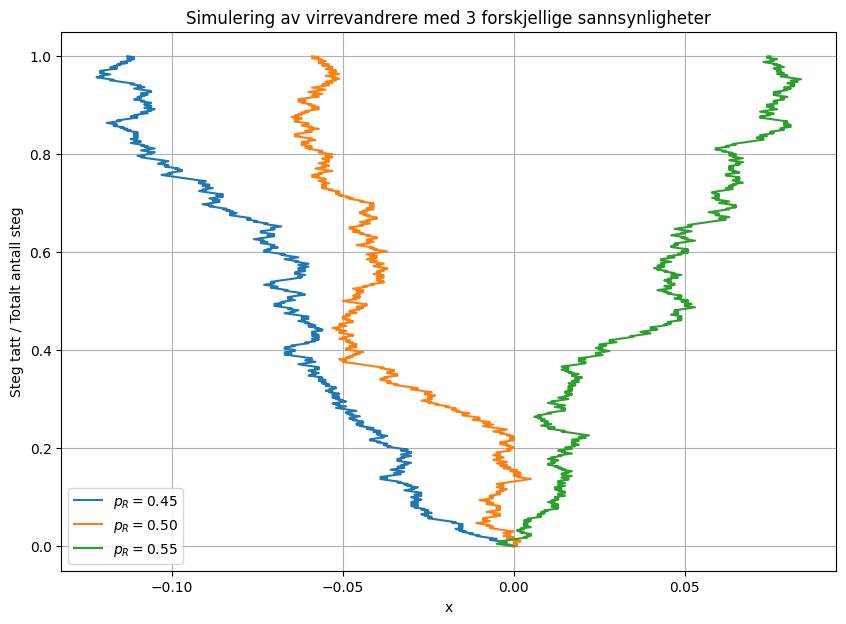

In [37]:
# Oppgave 1c)

# Parametere
M = 1000; dx = 1 / M

# Tester med 3 forskjellige sannsynligheter for å gå til høyre
test1 = OneDimBrownian(M, dx, p_R = 0.45)
test2 = OneDimBrownian(M, dx, p_R = 0.50)
test3 = OneDimBrownian(M, dx, p_R = 0.55)

# Splitter opp testresultatene så de er lette å bruke til å plotte
position1 = test1[0]; time1 = test1[1]
position2 = test2[0]; time2 = test2[1]
position3 = test3[0]; time3 = test3[1]

# Her plotter vi resultatene
plt.figure(figsize=(10, 7)) 
plt.title("Simulering av virrevandrere med 3 forskjellige sannsynligheter")
plt.plot(position1, time1, label = rf"$p_R = 0.45$")
plt.plot(position2, time2, label = rf"$p_R = 0.50$")
plt.plot(position3, time3, label = rf"$p_R = 0.55$")
plt.xlabel('x')
plt.ylabel('Steg tatt / Totalt antall steg')
plt.grid()
plt.legend()
plt.show()

***Svar oppgave 1c)***

Basert på valget deres av M, vurder om
simuleringene er representative for verdiene av $p_R$:

Vi valgte $M = 1000$. Dette ga en god representasjon av $p_R$. Vi har testet med lavere $M$, som $100$ og $500$, og da observerer vi for eksempel at på $p_R = 0.5$ at virrevandreren først beveger seg fra origo og mot venstre og så beveger seg brått til høyre. For $p_R = 0.45$ og $p_R = 0.55$ ser vi derimot at den beveger seg sterkere mot en av sidene, selv om den kan hoppe litt fram og tilbake. Dette er veldig forventet. Et spesielt viktig resultat er at på $M = 1000$ så ser vi at for $p_R = 0.5$ holdes virrevandrerer generelt sett i midten. Hvis dette ikke hadde vært tilfellet hadde ikke grafen representert det vi ville ha. De andre grafene beveger seg også generelt i deres respektive retninger definert fra sannsynlighetene som vi ser i plottet over oss. En liten ting å merke er at på grunn av den bråheten vi kan se med lavere M, betyr dette at i slike tilfeller er det ikke nødvendig at de ulike plottene faktisk beveger seg til høyre eller venstre. Jo mindre M, jo mer kaos.


# Oppgave 1 d)

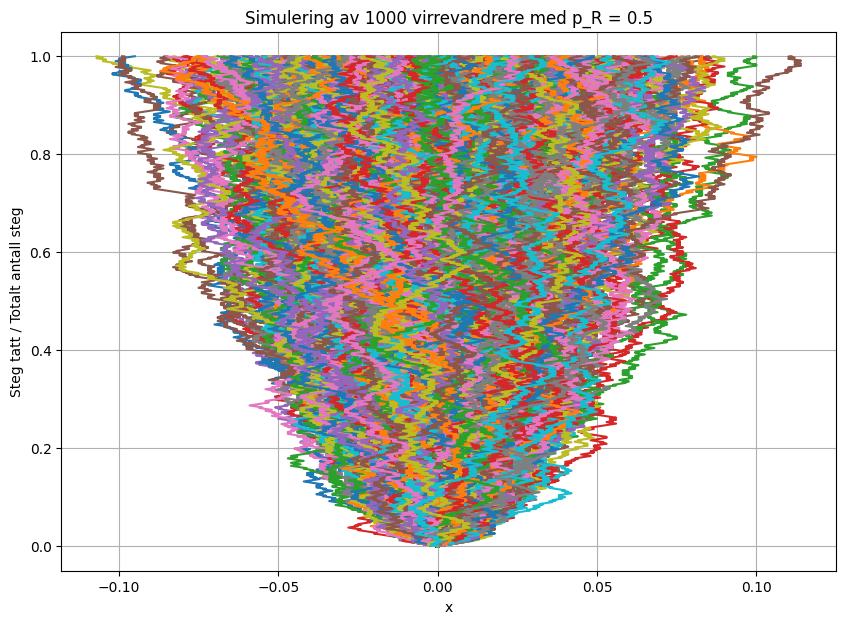

In [38]:
# Oppgave 1 d)
N = 1000 # Antall virrevandrere
M = 1000 # Antall tidssteg
dx = 1 / M # Steglengde

def N_brownians(N, M, dx, p_R):
    """
    Denne metoden utfører algoritme 1 N ganger og returnerer resultatene.
    """
    x = np.zeros((N, M)) # Initialiserer en matrise for å putte inn posisjonene våre per virrevandr
    timesteps = None

    # Her utfører vi N randomwalks og putter resultatene inn i x
    for i in range(N):
        values = OneDimBrownian(M, dx, p_R)
        
        if(timesteps is None): # Dette gjør vi siden vi har samme tidssteg for alle virrevandrere så vi lagrer bare en av dem.
            timesteps = values[1]

        for j in range(M):
            x[i, j] = values[0][j]

    # Her returnerer vi posisjonene våre og tidsstegene til alle virrevandrere
    return x, timesteps


# Her plotter vi alle virrevandrerene for parameterene beskrevet øverst. Dette er ikke et krav i oppgaven men vi gjør det så vi ser om plottene ser riktige ut.
x, timesteps = N_brownians(N, M, dx, p_R = 0.50)
plt.figure(figsize=(10, 7))
plt.title(f"Simulering av {N} virrevandrere med p_R = 0.5")
for i in range(N):
    plt.plot(x[i, :], timesteps)
plt.xlabel('x')
plt.ylabel('Steg tatt / Totalt antall steg')
plt.grid()
plt.show()

# Oppgave 1 e)

In [39]:
def OneDimBrownianOptimized(M, dx, p_R):
    """
    Denne metoden utfører algoritme 1 mye raskere enn det vi var gitt direkte fra oppgaven.
    """
    # Her bruker vi np.where for å lage en liste med steg.
    direction = np.where(localRandom.uniform(0, 1, M) < p_R, dx, -dx)
    direction[0] = 0 # Passer på at vi starter i origo
    # Her bruker vi kumulativ sum for å finne ut veien virrevandrere vår kommer til å ta, og så returnerer vi dette med tidsstegene dens.
    return np.cumsum(direction), np.arange(M) * dx

def N_brownians_optimized(N, M, dx, p_X):  
    """
    Denne metoden utfører algoritme 1 N ganger med den optimaliserte funksjonen OneDimBrownianOptimized istedenfor OneDimBrownian
    """
    return [OneDimBrownianOptimized(M, dx, p_X) for i in range(N)]

print("Uoptimalisert versjon av algoritme 1 (M = 1000, dx = 1, p_R = 0.5): ")
%timeit -n 3 N_brownians(1000, 1000, 1, 0.5)
print("Optimalisert versjon av algoritme 1 (M = 1000, dx = 1, p_R = 0.5): ")
%timeit -n 3 N_brownians_optimized(1000, 1000, 1, 0.5)

Uoptimalisert versjon av algoritme 1 (M = 1000, dx = 1, p_R = 0.5): 
1.32 s ± 76.6 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)
Optimalisert versjon av algoritme 1 (M = 1000, dx = 1, p_R = 0.5): 
34.6 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


***Svar på oppgave 1e)***

Det finnes mange ulike årsaker til at Numpy er bedre å bruke enn ren Python. Den første og kanskje viktigste grunnen er at Numpy er skrevet i C/C++, som er et lavnivå programmeringsspråk som er både raskere og mer effektivt en Python som er et høynivå språk. Python er "interpreted", hvor C/C++ er "kompilert" språk, så imens Python må tolke hva du skriver når du kjører koden (noe den gjør relativt treigt), så er allerede C koden kompilert på en bra måte som gjør at det er mye raskere å kjøre slik. Det at Numpy er skrevet slik, innebærer da at koden vår blir kjørt direkte i C/C++ og ikke i Python. Dette gjør da at koden vår også blir raskere og mer effektiv. Spesielt viktig, er kanskje den mer effektive lagringen av lister i C/C++ i motsetning til i Python. I motsetning til Python tillater Numpy kun en type data i en liste, og lagrer da også disse listene kontinuerlig og da et sted i minnet. Dette gjør at koden som kjøres i C/C++ går mye raskere enn den hadde gjort i Python. Dette blir raskere da fordi når Python godtar flere forskjellige typer i en liste, blir ikke disse lagret på samme sted. Hvis du for eksempel har en liste med en liste, en matrise og en streng i seg, er disse helt uavhengige objekter forskjellige steder i minnet. Python lagrer da en liste med en "lenke" eller da en pointer til disse og ikke dem direkte. I Numpy, hvor man kun har en type om gangen blir disse lagret samme sted og rett etter hverandre i minnet. Videre inneholder også Numpy mange optimaliserte numeriske funksjoner og algoritmer som gjør "komplekse" beregninger på en god og effektiv måte som ikke vi nødvendigvis kan lage lett selv.

# Oppgave 1 f)

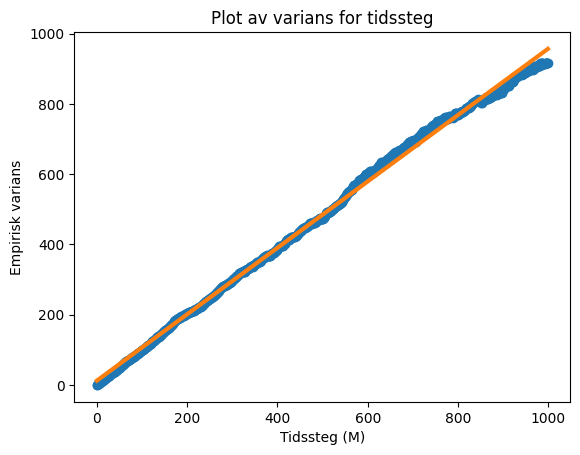

Stigningstallet til kurven er: 0.9449137197352486


In [40]:
import scipy.optimize as optimize

def empirical_variance(brownians):
    """
    Denne metoden finner empirisk varians til et viss gitt antall virrevandrere.
    """
    positions = [result[0] for result in brownians]
    # Her bruker vi bare numpy for å finne variansen med en delta degrees of freedom på 1.
    return np.var(positions, axis=0, ddof = 1)

M = 1000 # Antall tidssteg
N = 1000 # Antall simuleringer
dx = 1 # Steglengde
p_R = 0.5 # Sannsynlighet for å gå til høyre

# Vi utfører N antall simuleringer med vår nye optimaliserte kode
results = N_brownians_optimized(N, M, dx, p_R)
timesteps = np.arange(0, M)

# Vi finner deretter variansen deres
variance = empirical_variance(results)

# Vi setter opp en lineær funksjon f(x, a, b) = ax + b
linear_function = lambda x, a, b: a * x + b

# Vi bruker videre scipy.optimize.curve_fit for å finne den nærmeste lineære kurven som passer med variansen vår.
params, cov = optimize.curve_fit(linear_function, timesteps, variance)

# Her plotter vi resultatene våre
plt.plot(timesteps, variance, '-o')
plt.plot(timesteps, linear_function(timesteps, params[0], params[1]), label='fit', linewidth = 3)
plt.xlabel('Tidssteg (M)')
plt.ylabel('Empirisk varians')
plt.title("Plot av varians for tidssteg")
plt.show()

# Til slutt printer vi ut stigningstallet til kurven slik at vi kan sammenligne den med det teoretiske svaret
print("Stigningstallet til kurven er:" , params[0])

***Svar på oppgave 1f)***

Her ser vi at kurven vår passer en lineær kurve $y = ax + b$, hvor  $(a, b) \approx (1, 0)$ hver gang vi kjører den. Dette passer svært bra med stigningstallet vi fikk oppgave 1a) som da var at $a = 1$. Dette tilsvarer da at variansen vår er: $\sigma^2 = at = t$ som er den kurven vi får, selv om vi definitivt har et støyledd $\varepsilon_i$ som gjør linjen litt "skurrete". 

For å få den empiriske variansen til å samsvare med det analytiske resultatet så burde man nok simulere med høyere $N$, ettersom en høyere $M$ øker det statistiske støyet fra slumptallene vi genererer til virrevandreren. Dersom vi simulerer flere ganger, vil vi få en enda rettere linje som representerer den forventede variansen. Dette er fordi empirisk varians blir mer og mer nøyaktig med mer data. Økt $M$ vil forårsake enda mer støy i leddene, så vi vil heller øke $N$. Vi vil da øke antall observasjoner som vil være mer presis representasjon. Dette kan testes ved å for eksempel doble antall simuleringer $N$, hvor man da umiddelbart observerer en rettere linje som representerer lineariteten i variansen.

# Oppgave 1 g)

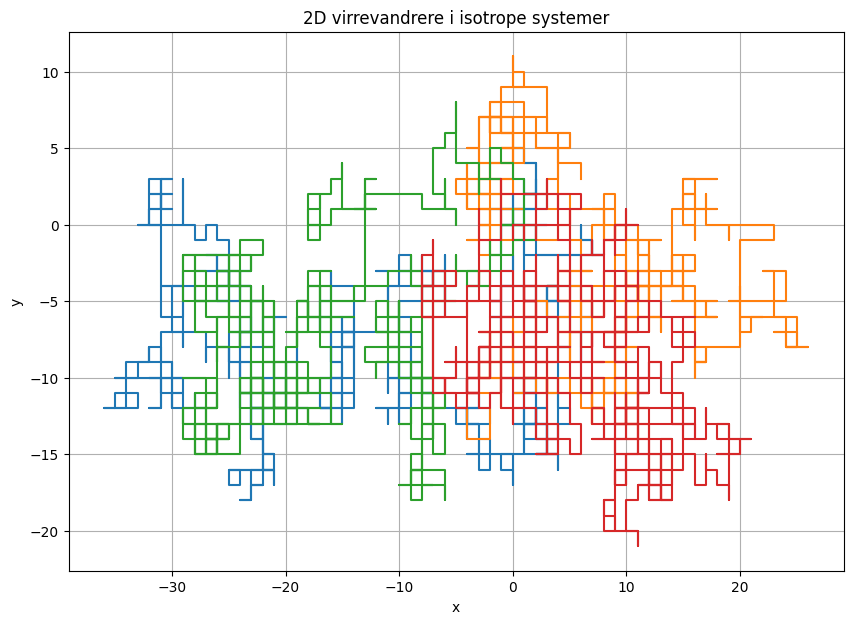

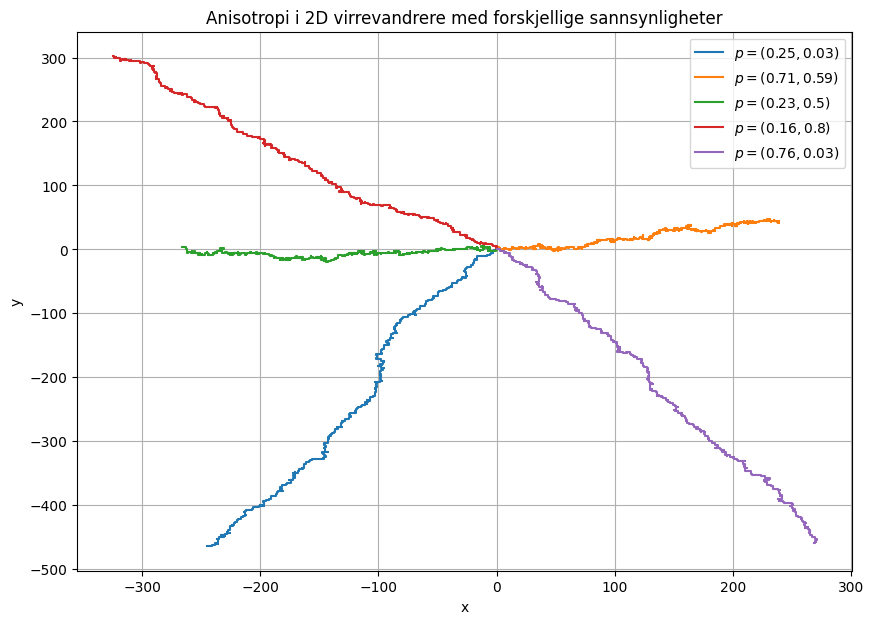

In [49]:
def BrownianOptimized2D(M, dx, p_X, p_Y):
    
    """
    Optimalisert funksjon for virrevandrer i to dimensjoner.
    Bruker numpy funksjoner for effektivisering av koden.
    M: tidssteg
    dx: steglengde
    p_X, p_Y: sansynnlighet til å bevege seg til horisontalt (x) og vertikalt (y).
    """

    # Definerer en liste som bestemer retningen til x og y stegene
    stepsX = np.where(localRandom.uniform(0, 1, M) < p_X, 1, -1)
    stepsY = np.where(localRandom.uniform(0, 1, M) < p_Y, 1, -1)

    A = np.array([[1, 0], [0, 1]]) # Definerer retningsvektorer for x og y retning
    vectorsteps = A[np.random.randint(A.shape[0], size=M), :] # Velger en tilfeldig liste med vektorer i enten y eller x retningen
    vectorsteps[0] = [0, 0] # Setter første bevegelse til 0 slik at den starter i origo
    
    # Legger sammen de tifeldig rettningsstegene med de tilfeldige valgte retningsvektorene slik at den bare beveger seg i en retning om gangen
    # Og ganger inn steglengden slik at hvert steg er riktig lengde, altså dx
    steps = np.column_stack((stepsX * vectorsteps[:, 0], stepsY * vectorsteps[:, 1])) * dx 
    # Bruker numpy cumulative sum til å legge samme alle hoppene som har skjedd opp til punktene
    return np.cumsum(steps[:,0]), np.cumsum(steps[:,1])  # Retunerer x og y posisjonene


def N_brownians_optimized_2d(N, M, dx, p_X, p_Y):  
    """
    Lager N antall 2D virrevandrere.
    N: antall virrevandrere 
    M: tidssteg
    dx: steglengde, 
    p_X, p_Y: sansynnlighet for virrevandrer å bevege seg horisontalt (x) og vertikalt (y)
    """
    return [BrownianOptimized2D(M, dx, p_X, p_Y) for i in range(N)] # Bruker list comprehension til å lage N antall 2D virrevandrere

M = 1000 # Tidssteg
dx = 1 # Steglengde

# Her plotter vi resultatene
plt.figure(figsize=(10, 7))

probabilities = [(0.5, 0.5)] * 4 # Setter sansynligheten for 4 virrevandrer i det isotropte systemet

# Her plotter vi 4 isotropevirrevandreres
for i in range(len(probabilities)):
    x, y = BrownianOptimized2D(M, dx, probabilities[i][0], probabilities[i][1]) # Henter ut 4 isotroptevirrevandrere 
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")

plt.title("2D virrevandrere i isotrope systemer")
plt.grid()  
plt.show()

plt.figure(figsize=(10, 7))
probabilities = [(0.25, 0.03), (0.71, 0.59), (0.23, 0.5), (0.16, 0.8), (0.76, 0.03)] # Setter sansynligheten for 4virrevandrern i det anisotropte systemet

# Plotter 4 anisotropevirrevandrere for å sammenlikne sannsynlighetenes
for i in range(len(probabilities)):
    x, y = BrownianOptimized2D(M, dx, probabilities[i][0], probabilities[i][1]) # Henter ut 4 anisotroptevirrevandreres med sannsylighetene settet ovenfor
    plt.plot(x, y, label = rf"$p = {(probabilities[i][0], probabilities[i][1])}$")
    plt.xlabel("x")
    plt.ylabel("y")

plt.title(rf"Anisotropi i 2D virrevandrere med forskjellige sannsynligheter")
plt.legend()
plt.grid()  
plt.show()

***Svar på oppgave 1g)***

I den isotrope figuren hvor $p_R = 0.5$ i begge rettningene, ser vi at virrevandrere beveger seg relativt likt i både venstre og høyre, og det holder seg rundt origo, som er forventet i et isotropt system. Det er også mye større varriasjon i virrevandrene sin bevgelse, ettersom at sannsynligheten er tifeldig.

Når vi deretter tester med ulike sannsynligheter ser vi umiddelbart anisotropien. I grafen over kan man helt klart se hvordan de ulike sannsynlighetene "drar" virrevandrerne i ulike retninger.Og jo større sannsynlighet det er langs en retning i forhold til en annen, jo lengre vil virrevandrerer bevege seg. Dette ser vi sterkt ved at de ulike virrevandrerne helt klart har bevegd seg ulike lengder. Det bekrefter også det vi skrev for den isotrope figuren med at den holder seg rundt origo. For den isotropiske figuren er de høyeste x og y verdiene vi finner opp mot 100-150, mens for anisotropiske virrevandrere, nærmer den seg M'en vår. I tillegg ser vi også at hvis vi kjører grafen på nytt vil den isotropiske figuren endre seg helt og bli helt tilfeldig, mens den anisotropiske vil ha ganske like linjer.


# Oppgave 1 h)

In [42]:
def N_origo_visits_at(brownians, M):
  """
    Teller opp antall virrevandrer som er i origo på hvert tidsteg i 1D.
    brownians: liste med 1D virrevandrer
    M: tidsteg 
  """
  n = np.zeros(M) # Definerer en tom liste som skal fylles ut med virrevandrene som treffer origo
  t = np.arange(0, M, 2) # Definerer alle tidstegene
  
  # Går gjennom alle virrevandrerene som blir gitt
  for brownian in brownians:
    for step in t: # Går gjennom alle tidstegene for en virrevandr
      if step % 2 == 0 and step != 0: # Hopper over partall siden disse ikke er relevante
        if brownian[0][step] == 0: # Sjekker om virrevandren er i origo
          n[step] += 1 # Legger til 1 hvis den var i origo
          break # Stopper loopen hvis virrevandren har vært i origo ettersom at den ikke skal telles igjen hvis den kommer til origo senere

  return n, t # Retunerer en liste n: med antall virrevandrer som er i origo på hvert tidsteg, og en liste t: alle tidstegene

def N_origo_visits_up_to(origovisits):
  """
    Legger sammen den totalen mengden med virrevandrere som har vært i origo opp til hvert tidsteg
    origovisits: liste med antall virrevandrer som er i origo på hvert tidsteg
  """
  # Bruker numpy cumulative sum til å legge samme alle virrevandrene som er opp til vært tidsteg
  return np.cumsum(origovisits) # Retunerer en liste med alle virrevandreene som har vært i origo opp til hvert tidsteg

***Svar på oppgave 1 h)*** 

Sannsynligheten for at $P(x = 0, t = 1)$ må være $0$. Ettersom at den virrevanderen starter i origo, vil den alltid hoppe vekk fra origo ved $t = 1$. Dermed kan virrevanderen ikke være i origo ved $t = 1$, dette gjelder for virrevandere i alle dimensjoner hvis vi antar at den beveger med et hopp om gangen. 

Sannsynligheten for å finne virrevanderen i origo er også $0$ for alle odde verdier av $t$, etter som at for hvert hopp vekk fra origo må den ha det samme antall hopp tilbake. Det gir at antall hopp blir $oddetall * 2$ som alltid vil gi et partall. Dermed vil n(t) bare endre seg for partall verdier av t. Dette gjelder også for alle dimensjoner og kan også brukes for effektivisering av koden.

Sannsynligheten for at $P(x = 0, t = 2)$  i 1D er $0.5$. Grunnen er ettersom den i første punkt beveger seg et hopp vekk fra sentrum og i den nye posisjonen kan den enten hoppe tilbake eller lengre fram, med lik sannsynlighet på 0.5. Og det er bare en av hopprettningene som går tilbake til origo.

Sannsynligheten for at $P(x = 0, t = 2)$  i 2D er $0.25$. Begrunnelsen er den samme som i 1D, bare at i stedet for å ha 2 muligheter å velge mellom har den 4 dermed blir sannsynligheten mindre.




# Oppgave 1 i)

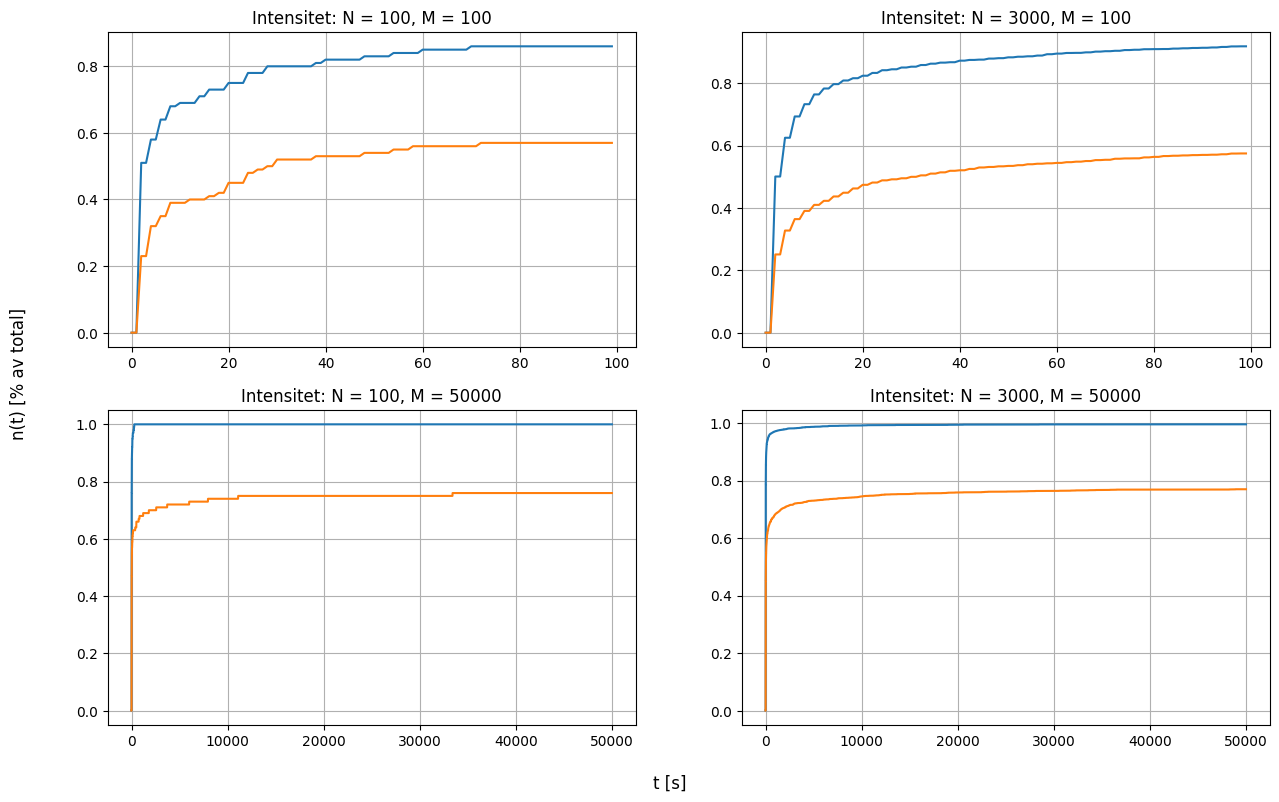

In [43]:
def N_origo_visits_at_2d(brownians, M):
  """
    Teller opp antall virrevandrer som er i origo på hvert tidsteg i 2D.
    brownians: liste med 2D virrevandrer, M: tidsteg 
  """
  
  n = np.zeros(M) # Definerer en tom liste som skal fylles ut med virrevandrer som treffer origo
  t = np.arange(0, M) # Definerer alle tidstegene
  
  for i, brownian in enumerate(brownians):
      try: # Bruker try, except til å sjekke om virrevandreren har truffet origo, hvis den ikke har forsetter funksjonen
        equalindices = np.where((np.abs(brownian[0]) < 1e-9) & (np.abs(brownian[1]) < 1e-9), 1, 0) # Bruker numpy where til å finne ut når både x og y aksen er 0
        # slik at virrevandren er i origo
        secondIndex = np.nonzero(equalindices == 1)[0][1] #Finner tid indexen til det første punktet som er i origo
        n[secondIndex] += 1 # Legger til virrevandrer til det første punktet den er i origo
      except:
        continue

  return n, t # Retunerer en liste n: med antall virrevandrere som er i origo på hvert tidsteg, og en liste t: alle tidstegene


Nlist = [100, 100, 3000, 3000] # Liste med antall virrevandrere
Mlist = [100, 50000, 100, 50000] # Liste med antall tidsted
Indices = [[0, 0], [1, 0], [0, 1], [1, 1]] # Definerer alle plotene

# Plotter resultatene våre
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
p_R = 0.5
# Plotter fire forskjelig plotts med forskjellige N og M
for i in range(len(Nlist)):
  N = Nlist[i]
  M = Mlist[i]
  Indexes = Indices[i]
  # Henter ut virrevandrereefor 1D og 2D med de bestemte N og M
  brownians = N_brownians_optimized(N, M, dx, p_R)
  brownians2d = N_brownians_optimized_2d(N, M, dx, p_R, p_R)

  # Henter ut listen med totalen mengden med virrevandrer som er i origo på hvert tidsteg, for 1D og 2D
  n_at, t = N_origo_visits_at(brownians, M)
  n_at_2d, t = N_origo_visits_at_2d(brownians2d, M)

  # Fjerner origo ettersom at alle starter i origo

  # Henter ut listen med totalen mengden med virrevandrer som er i origo opp til hvert tidsteg, for 1D og 2D
  n_to = N_origo_visits_up_to(n_at)
  n_to_2d = N_origo_visits_up_to(n_at_2d) 

  # Plotter resultatet
  ax[Indexes[0], Indexes[1]].plot(t, n_to / N, label = "1D")
  ax[Indexes[0], Indexes[1]].plot(t, n_to_2d / N, label = "2D")
  ax[Indexes[0], Indexes[1]].set_title(rf"Intensitet: N = {N}, M = {M}")
  ax[Indexes[0], Indexes[1]].grid()
fig.text(0.5, 0.04, "t [s]", ha='center', fontsize = 12)
fig.text(0.06, 0.5, "n(t) [% av total]", va='center', rotation='vertical', fontsize = 12)

plt.show()

***Oppgave 1i)***

Ovenfor ligger resultatatene for n(M) for en og to dimensjoner med ulike M og N. Vi ser at for det to-dimensjonale tilfellet at n(M) ligger under den endimensjonale grafen. Dette er fordi det tar mye lenger tid for 2D å treffe origo på grunn av en ekstra dimensjon. Vi ser også at for en høyere M så vil den konvergere mer og mer mot det en-dimensjonale tilfellet, og teoretisk sett vil være analytisk for $M \to \infty$. Vi ser at i tillegg at grafen blir mindre hakkete med økt $N$. Altså grafen blir mindre diskret og mer kontinuerlig. Den to-dimensjonale virrevandreren holder seg på cirka 75-80% av 100% med høye verdier (30000 ish) av $M$, så det skal mye til før n(M) konvergerer, men etter testing opp mot en M på flere millioner ser vi at den når opp mot og over 90% så hvis vi tar $M \to \infty$ er det forventet at den kommer til å konvergere mot 100%.

# Oppgave 2 a)

In [44]:
#Hensiktsmessig måte å inkludere fysiske enheter på i fremtidige simuleringer
dt = 0.01 # [s] (tid)
time = 1 # [s]
M = int(time / dt) # Tidsteg

dx = 0.004 # [mm]
D_healthyTissue = (dx)**2 / (2*dt) # Regner ut diffusjonskonstanten for friskt vev

print("Diffusjonskonstanten i friskt vev er ", round(D_healthyTissue, 7), "mm^2 s^-1")

Diffusjonskonstanten i friskt vev er  0.0008 mm^2 s^-1


# Oppgave 2 b)

In [45]:
def placeTumors(xCoords, yCoords, tumors, area, dx):
    """
    Regner ut hvor tumors er og regner ut endringen av dx tumoren gjør på virrevandrere som beveger seg gjennom
    xCoords: liste med x kordinater, yCoords: liste med y kordinater , tumors: tumore sin posisjon og koeffisientene på formen ((x , y), k) , area: størrelsen på tumor , dx: steglengde
    Returnerer en matrise som inneholder de nye dx verdiene etter tumorene har blit plassert
    """

    xmatrix, ymatrix = np.meshgrid(xCoords, yCoords) # Lager matrisen ut fra x og y kordinatene
    dx = np.zeros_like(xmatrix) + dx # Lager en matrise med alle dx verdiene før plaseringen av tumorene

    radiusSquared = area / np.pi # Regner ut radiusen til tumorene

    t_k = np.array([t[1] for t in tumors]) # Henter tumor koeffisientene for alle tumorene i en liste

    pos = np.array([t[0] for t in tumors]) # Henter tumor posisjonene for alle tumorene i en liste

    # Finner avstanden tumoren bruker i x og y retning, for hver tumor og lager en liste med verdiene
    x_distance = xmatrix - pos[:,0][:, np.newaxis, np.newaxis] 
    y_distance = ymatrix - pos[:,1][:, np.newaxis, np.newaxis]
    posDistanceSquared = x_distance**2 + y_distance**2 # Regner ut arealet som hver tumor bruker og lager en liste med verdiene
    
    # Regner ut de nye dx verdiene etter at tumorene har blitt plasert ut
    for i in range(len(tumors)):
        dx[posDistanceSquared[i] <= radiusSquared] *= np.sqrt(t_k[i]) # Endrer på dx verdien som er inni området til tumoren

    return dx # Returnerer en matrise som inneholder de nye dx verdiene etter tumorene har blit plassert
    

# Oppgave 2 c) + funksjonen til d) og e)

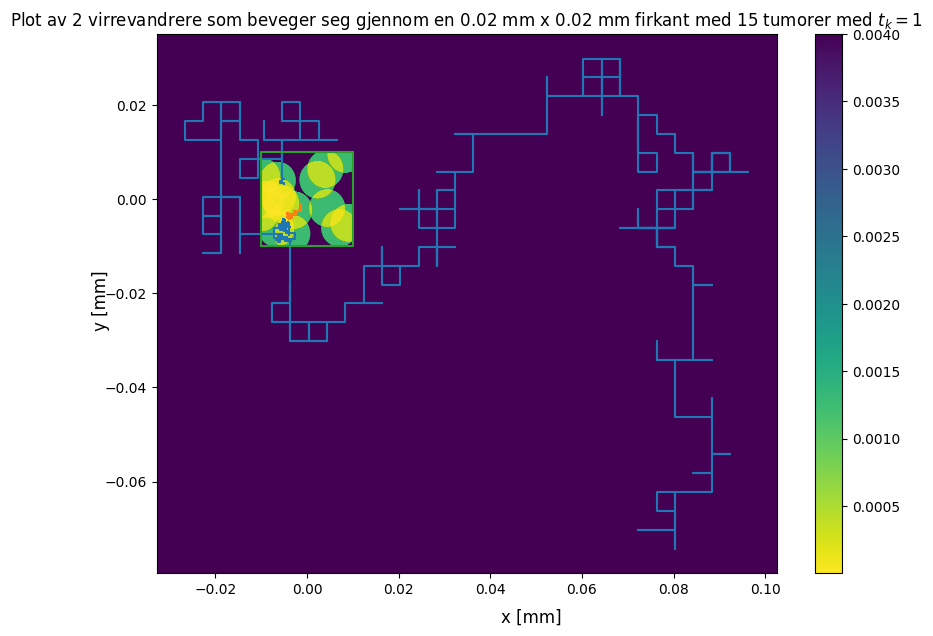

In [46]:
def createTumors(L, tumorCount, dx, n, t_kmin, t_kmax, tumorsize):
    """
    Lager og tilfeldig plaserer alle tumorene med tilfeldige tumor koeffisientene.
    L: lengden til sidene i området
    tumorCount: antall tumors
    M: tidsteg, dx: steglengde
    N: griddlengde
    t_kmin: minste verdi til tumor koeffisientene
    t_kmax : størrste verdi til tumor koeffisientene, 
    tumorsize: størrelsene til tumorene              ¨
    Returnerer en linspace for x og y i tillegg til en meshgrid som beskriver dx over hele området vi ser på 
    """
    x = y = np.linspace(-L / 2.0, L / 2.0, n) # Lager en liste for alle stegene for lengden til området
    tumorArea = np.pi * tumorsize** 2 # Regner ut størrelsen til tumorene
    tumors = [0] * tumorCount # Lager en tom liste som skal fylles ut med alle tumorpossisjonene
    
    # Genererer tumorene sin possisjon og koeffisientene for alle tumorene
    for i in range(tumorCount):
        tumors[i] = (( (localRandom.uniform(-L / 2.0, L / 2.0), localRandom.uniform(-L / 2.0, L / 2.0)), localRandom.uniform(t_kmin, t_kmax))) # Plasserer ut tumorene tilfeldig og gir de en tilfeldig koeffisient, på formen ((x , y), k)
    
    return x, y, placeTumors(x, y, tumors, tumorArea, dx) # Retunerer lengden til området i to lister x , y, og matrise som inneholder de nye dx verdiene etter tumorene har blit plassert
    
# Parametere
n = 1000
M = 1000
dx = 0.004
# Plotting the tumors in a heatmap
L = 0.02
x, y, valuematrix = createTumors(L = L, tumorCount = 15, dx = dx, n = n, t_kmin = 0.1, t_kmax = 0.1, tumorsize = dx)
fig, ax = plt.subplots(figsize=(10, 7))
shading = 'nearest'
cmap = ax.pcolormesh(x, y, valuematrix, cmap = "viridis_r", shading="gouraud")
fig.colorbar(cmap, ax=ax)
ax.set_facecolor(cmap.get_cmap()(cmap.get_cmap().N))


def translate_to_grid_indices(position, L, n_x, n_y):
    """
    Transformerer x og y koordinater til indexer i dx matrisen.
    """
    multiplicative = np.array([1 / (L / (n_x - 1)),  1 / (L / (n_y - 1))])
    indices = np.array(position, dtype=np.float32) * multiplicative + np.array([(n_x - 1) // 2, (n_y - 1) // 2])
    return indices.astype(np.int32)

def BrownianOptimized2DWithMatrixDx(M, n_x, n_y, n_tumors, valuematrix, p_X, p_Y, L, boundary = False, recoverPaths = False):
   
    """
    Algoritme for 2D virrevandrer - optimalisert med en matrise med effektive dx verdier.
    M: tidssteg
    n_x: grids i intensitetskartet i x retningen
    n_y: grids i intensitetskartet i y retningen
    n_tumors: grids per koordinat-akse (i dette tilfellet, n_x = n_y) <- tumorkart
    valuematrix: matrise med effektive dx verdier
    p_X, p_Y: sannsynlighet for bevegelse til virrevandrer i x og y retning 
    L: lengde på boks som innelukker virrevandrer.
    boundrary: boolean for grensebetingelser
    recoverPaths: finner hvor virrevandrer befinnes/befant seg
    """

    if recoverPaths:
        paths = np.zeros((n_x, n_y)) # Hvis paths er enabled, husk på hvor paths er (finn intensitet)
    
    # np.where for å endre på verdier til stegene på virrevandrer avhengig av sannsynlighet per retning.
    stepsX = np.where(localRandom.uniform(0, 1, M) < p_X, 1, -1)
    stepsY = np.where(localRandom.uniform(0, 1, M) < p_Y, 1, -1)

    # Initialisere matrise for stegene (all kode er lik som for oppgave 1g for en optimalisert kode)
    A = np.array([[1, 0], [0, 1]])
    vectorsteps = A[np.random.randint(A.shape[0], size=M), :]
    vectorsteps[0] = [0, 0]
    steps = np.column_stack((stepsX * vectorsteps[:, 0], stepsY * vectorsteps[:, 1])) # Stabler stegene som kolonnevektorer
    
    # Lager matrise med x og y koordinater til våre virrevandrere. Disse koordinatene er uavhengig av matrisene for fri bevegelse fra grid.
    positions = np.zeros((M, 2))

    # Setter startposisjon i et tilfeldig (slumptall) sted innenfor boks
    positions[0] = localRandom.uniform(-L / 2, L / 2, 2)
    
    # Beveger oss fra 0 til M tidssteg
    for i in range(1, M):
        # Oversetter indekser til rutenettet.
        indices = translate_to_grid_indices(positions[i - 1], L, n_tumors, n_tumors)
        effective_dx = dx
        
        # For alle indekser større eller lik null og mindre enn n, så har vi denne effektive steglengden
        if (indices >= 0).all() and (indices < n_tumors).all():
            effective_dx = valuematrix.T[indices[0], indices[1]]

        # Initialisere nye X og Y verdier med effektiv dx.
        newVal = positions[i - 1] + steps[i] * effective_dx
        
        # Dersom vi har med grensebetingelser, så har vi disse X og Y verdiene, sørger for at vi ikke havner utenfor grid.
        if boundary:
            newVal = (newVal + L / 2.0) % L - L / 2.0

        positions[i] = newVal
        if recoverPaths:
            indices = translate_to_grid_indices(positions[i - 1], L, n_x, n_y)
            paths[indices[0] + 1][indices[1] + 1] += 1
    if recoverPaths:
        return positions[:, 0], positions[:, 1], paths     
    
    return positions[:, 0], positions[:, 1] # To matriser med X og Y verdier.

# Her plotter vi N virrevandrere som beveger seg gjennom effektive dx-matrisen
N = 2
for i in range(N):
    xPath, yPath = BrownianOptimized2DWithMatrixDx(M, n, n, n, valuematrix, 0.5, 0.5, L)
    ax.plot(xPath, yPath)   

points = np.array([[-L/2, -L/2], [L/2, -L/2], [L/2, L/2], [-L/2, L/2], [-L/2, -L/2]])
ax.plot(*points.T)
fig.text(0.5, 0.04, "x [mm]", ha='center', fontsize = 12)
fig.text(0.06, 0.5, "y [mm]", va='center', rotation='vertical', fontsize = 12)
plt.title(rf"Plot av 2 virrevandrere som beveger seg gjennom en 0.02 mm x 0.02 mm firkant med 15 tumorer med $t_k = 1$")

plt.show()

***Svar på oppgave 2 c)***

Ved å plotte diffusjonskonstantene kan vi se påvirkningen tumorene har på området. Når to eller flere tumorer overlapper endres diffusjonskonstanten mye mer. Dette kan tydelig ses i heatmapet vårt med å se at fargen blir mye sterkere. Påvirkningen tumorene har på bevegelsen til virrevanderene kan også bli observert fra grafen, ettersom at virrevandrenes bevegelse blir påvirket av diffusjonskonstanten. 

Påvirkningen diffusjonskonstanten har på virrevandere kan observeres lett i heatmapet, ved at stegene den tar inne i tumoren tydelig er mye mindre enne det stegene er når den kommer seg ut an området med tumors

***Svar på oppgave 2 d)*** 

Vi valgte å bruke de periodiske randbetingelsene. 
Periodiske grensebetingelser brukes ofte for systemer med long-range interaksjoner. Årsaken var at i virkeligheten kommer virrevandrerene til å bevege seg ut og inn av området. Vi antar at den totale fluksen av virrevandrere i området vårt er null. Det betyr at for hver virrevandrer som forlater området bør det komme inn en ny en.

Vi vurderte harde vegger, men med stor M og N så vil dette tilsvare den periodiske betingelsen. Harde vegger kan brukes når systemet er innesperret eller når man studerer oppførselen til et system i kontakt med en overflate, noe som det ikke gjør her, så dermed valgte vi ikke harde vegger. Målet vårt for modelleringen passet best inn med de periodiske grensebetingelsene.

Fordeler med dette er at vi simulerer det som skjer i virkeligheten mer presist ved at det kommer inn nye virrevandrere fra en annen posisjon slik det gjør i virkeligheten. Ved å holde alle virrevandrene inne i området blir normaliseringen av intensiteten lik 1, ettersom alle bevegelsene skjer inne i området.
Et problem med denne metoden er at virrevandrere ikke trenger å komme inn i nøyaktig motsatt posisjon til den som forlot, dermed blir ikke simuleringen helt nøyaktig med det som skjer i virkeligheten, men med høye M og N'er vil dette ikke ha noen påvirkning.

Vi konkluderte ganske fort med at det å ikke bruke grensebetingelser blir minst nøyaktig. Ved å se på svaret vi fikk i oppgave 1i) ser vi at en del av virrevandrene ikke kommer til origo inne tiden vi bruker. Dermed antyder dettte at mange av virrevandrene beveger seg mye og kommer til å dra ut av boksen på et tidspunkt. Det gjør da at den totale intensiteten innenfør området ikke blir 1 i alle tilfeller, og det er urealistisk at systemets total antall virrevandrere minker mye. Dette er et problem når vi ser på et avgrenset område slik vi gjør i disse oppgavene. 

Disse grensebetingelsene implementerte vi rett inn i koden for 2 c) over, slik at koden blir raskere og mer effektiv. For å slå på denne funksjonen velger man at boundary parameteren i BrownianOptimized2DWithMatrixDx metoden skal være sann.


***Svar på oppgave 2 e)***

Vi valgte her å implementere dette rett inn i funksjonen i 2 c). Dette gjør koden raskere og mer effektiv. For å innhente denne dataen velger man da at recoverPaths parameteren i BrownianOptimized2DWithMatrixDx metoden skal være sann.


# Oppgave 2 f)

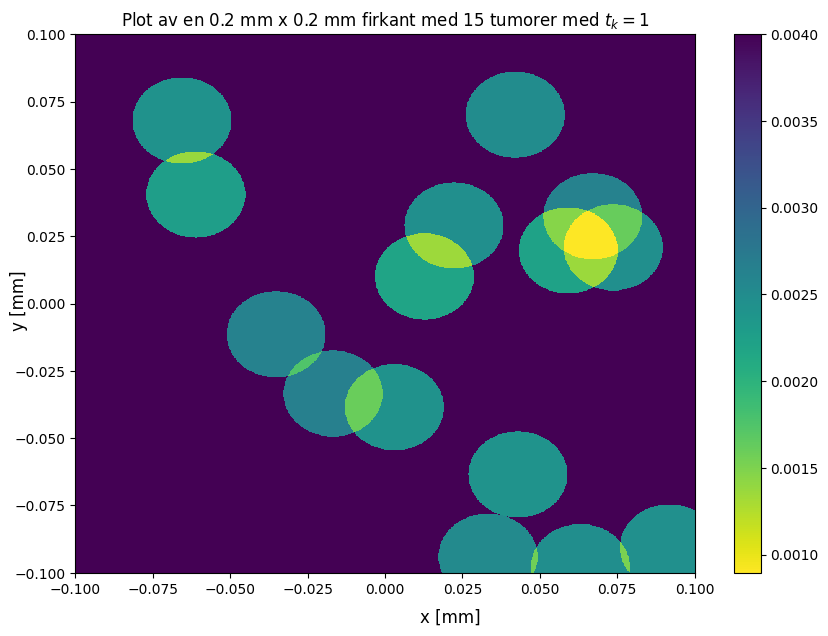

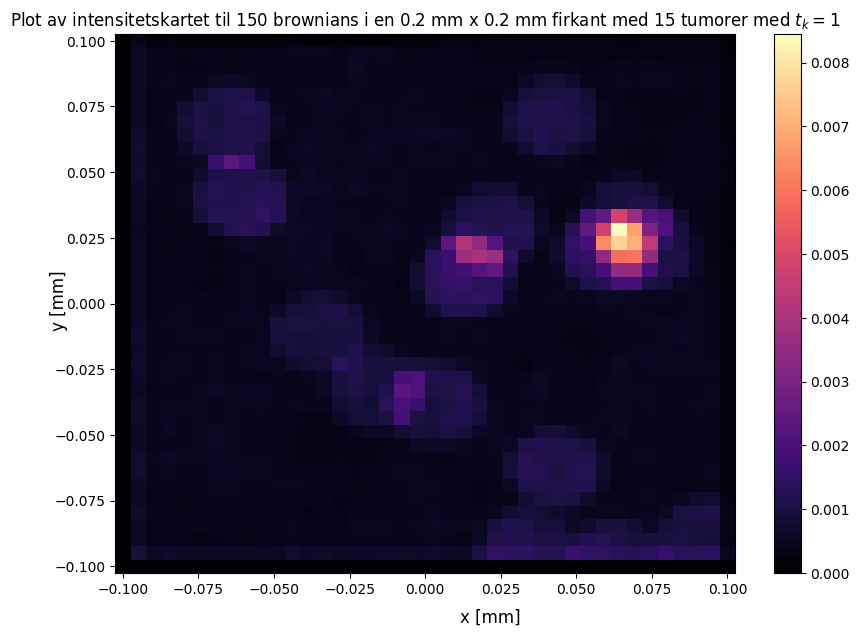

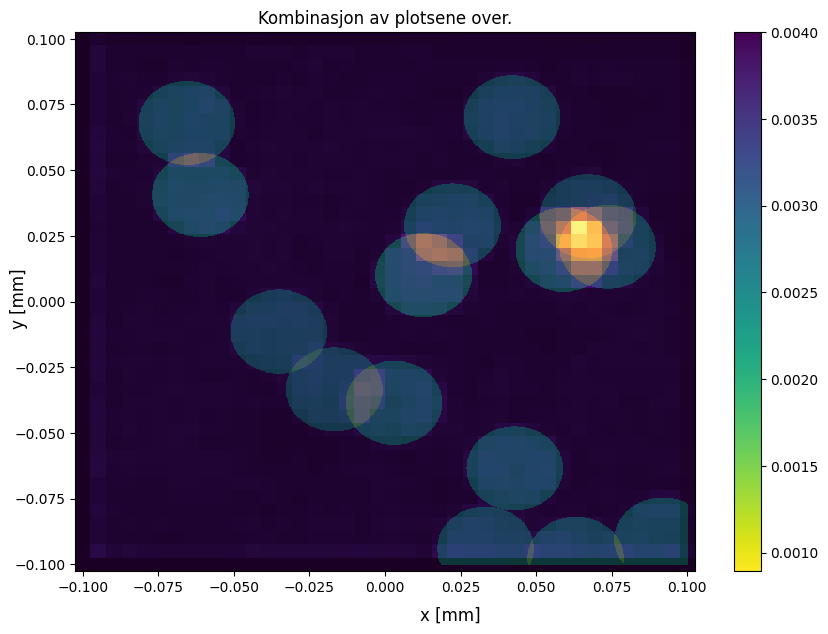

In [47]:
n = 40 # størrelse på rutenett
n_x = n # størrelse på rutenett for intensitetskart i x retning
n_y = n # størrelse på rutenett for intensitetskart i y retning
n_tumors = 1000
M = 10000 # antall tidssteg
dx = 0.004 # steg lengde
L = 0.2 # lengde på boks
N = 150 # antall simulasjoner

# Plotter tumorene i et heatmap
x, y, valuematrix = createTumors(L = L, tumorCount = 15, dx = dx, n = n_tumors, t_kmin = 0.3, t_kmax = 0.45, tumorsize = dx * 4) # Initialiser tumorer
fig, ax = plt.subplots(figsize=(10, 7))
shading = 'nearest'
cmap = ax.pcolormesh(x, y, valuematrix, cmap = "viridis_r", shading=shading) # xy grid, med effektiv dx matrise.
fig.colorbar(cmap, ax=ax)

fig.text(0.5, 0.04, "x [mm]", ha='center', fontsize = 12)
fig.text(0.06, 0.5, "y [mm]", va='center', rotation='vertical', fontsize = 12)
plt.title(rf"Plot av en 0.2 mm x 0.2 mm firkant med 15 tumorer med $t_k = 1$")

plt.show()

# Subplots
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_facecolor(cmap.get_cmap()(cmap.get_cmap().N))
pathTotal = np.zeros((n_x, n_y))

# Intensitetsmap plottes her for å få se intensiteten til tumorene
for i in range(N):
    xPath, yPath, paths = BrownianOptimized2DWithMatrixDx(M, n_x, n_y, n_tumors, valuematrix, 0.5, 0.5, L, True, True)
    pathTotal += paths

intensitymap = pathTotal.T / (N * M)
xintensity, yintensity = np.linspace(-L / 2, L / 2, n_x), np.linspace(-L / 2, L / 2, n_y)
cmap = ax.pcolormesh(xintensity, yintensity, intensitymap, cmap = "magma", shading = shading)
fig.colorbar(cmap, ax=ax)

fig.text(0.5, 0.04, "x [mm]", ha='center', fontsize = 12)
fig.text(0.06, 0.5, "y [mm]", va='center', rotation='vertical', fontsize = 12)
plt.title(rf"Plot av intensitetskartet til {N} brownians i en 0.2 mm x 0.2 mm firkant med 15 tumorer med $t_k = 1$")

plt.show()

# Plotter tumor map med intensitets map overlappet
fig, ax = plt.subplots(figsize=(10, 7))
cmap = ax.pcolormesh(x, y, valuematrix, cmap = "viridis_r", shading=shading)
fig.colorbar(cmap, ax=ax)
ax.set_facecolor(cmap.get_cmap()(cmap.get_cmap().N))
cmap = ax.pcolormesh(xintensity, yintensity, intensitymap, cmap = "magma", alpha = 0.6, shading = shading)

fig.text(0.5, 0.04, "x [mm]", ha='center', fontsize = 12)
fig.text(0.06, 0.5, "y [mm]", va='center', rotation='vertical', fontsize = 12)
plt.title(rf"Kombinasjon av plotsene over.")

plt.show()

***Svar på oppgave 2 f)*** 

Intensiteten kan brukes til å oppdage tumors i et lite konsentrert område. Ettersom at det blir en klar intensitetforskjell oppå tumorene. Ettersom at overlappende tumorer endrer diffusjonskonstanten mye mer enn det enkelttumorer gjør kan det være vanskelig å kartlegge alle tumorene når det er mange inne i et område. Dette skjer ettersom at det klart blir høyest intensitet hvor det er flest tumorer som overlapper. 

Dermed er intensitetskartet veldig bra til å finne posisjonen og størrelsen til de sterkeste tumorene, men det kan oppstå unøyaktigheter med de svakere tumorene. Disse svakere tumorene kan bli overskygget av de overlappende områdene og dermed kan det hende i noen tilfeller at de er svært vanskelige å se. I tillegg kan også en større eller mindre M, N, L, n_x og n_y påvirke svaret mye. Selv om en lavere n_x og n_y gjør bildet mer pixelert, gjør det også at vi kan se intensitetsforskjeller bedre. I motsatt tilfellet hvor disse er veldig store, vil man også kunne se for mange steg, og da få hulrom med null intensitet mellom avstander som er lavere enn dx'ene. En høyere M gjør også bildet mer klart, men hvis den er for høy, legger den for stort fokus på overlappene tumorer og kan gjøre bildet mindre lesbart.

# Oppgave 2 g)

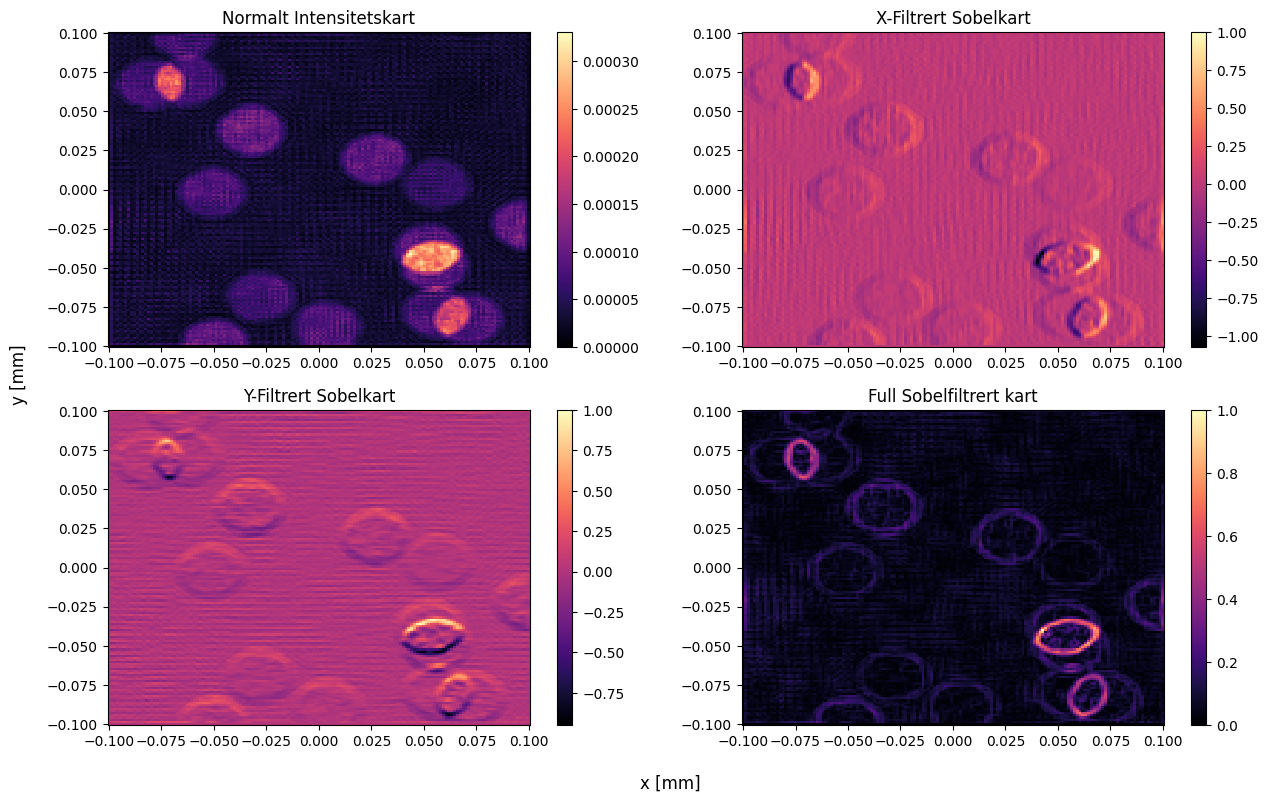

In [53]:
n = 150 # størrelse på rutenett (n_x = n_y)
n_tumors = 1000
M = 10000 # antall tidssteg
dx = 0.004 # steg lengde
L = 0.2 # lengde på boks
N = 150 # antall simulasjoner

# Plotter tumorene i et heatmap
x, y, valuematrix = createTumors(L = L, tumorCount = 15, dx = dx, n = n_tumors, t_kmin = 0.3, t_kmax = 0.45, tumorsize = dx * 4) # Initialiser tumorer

pathTotal = np.zeros((n, n))
# Intensitetsmap plottes her for å få se intensiteten til tumorene
for i in range(N):
    xPath, yPath, paths = BrownianOptimized2DWithMatrixDx(M, n, n, n_tumors, valuematrix, 0.5, 0.5, L, True, True)
    pathTotal += paths
intensitymap = pathTotal.T / (N * M)


xfilter, yfilter, sfilter = SobelFilter(n, n, intensitymap) # Kalle på Sobel filteret for x, y retning og total sobel filter.
x = y = np.linspace(-L / 2.0, L / 2.0, n) # Initialiser linært distribuert array av størrelse N

# Alt av plotting under for å sammenlikne Sobel-filteret.

# Plotting av intensitet maps (Normal)
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
cmap = ax[0, 0].pcolormesh(x, y, intensitymap, cmap = "magma", shading=shading)
fig.colorbar(cmap, ax=ax[0, 0])
ax[0, 0].set_title(rf"Normalt Intensitetskart")

x = y = np.linspace(-L / 2.0, L / 2.0, n - 2) # Initialiser linært distribuert array av størrelse N

# Plotter X-filter Sobel map
cmap = ax[0, 1].pcolormesh(x, y, xfilter, cmap = "magma", shading=shading)
fig.colorbar(cmap, ax=ax[0, 1])
ax[0, 1].set_title(rf"X-Filtrert Sobelkart")

# Plotter Y-filter Sobel map
cmap = ax[1, 0].pcolormesh(x, y, yfilter, cmap = "magma", shading=shading)
fig.colorbar(cmap, ax=ax[1, 0])
ax[1, 0].set_title(rf"Y-Filtrert Sobelkart")

# Plotter det fulle Sobel map
cmap = ax[1, 1].pcolormesh(x, y, sfilter, cmap = "magma", shading=shading)
fig.colorbar(cmap, ax=ax[1, 1])
ax[1, 1].set_title(rf"Full Sobelfiltrert kart")

fig.text(0.5, 0.04, "x [mm]", ha='center', fontsize = 12)
fig.text(0.06, 0.5, "y [mm]", va='center', rotation='vertical', fontsize = 12)

plt.show()

***Svar på oppgave 2g)***

Man bruker Sobel-filter for kantdeteksjon i bildebehandlig, så en grid size som er for stort kan føre til tap av detaljer og uskarphet i kantene. Dette blir forårsaket av at en større grid size vil bety en bredere konvolusjonskjerne, som gir et gjennomsnitt over flere piksler, som da vil redusere intensitetsgradienten og føre til uskarphet.

Det å skille tumorene fra hverandre blir vanskelig for lavere $n$ siden oppløsningen er for lav. Det blir lett å se der hvor intensiteten er høy, men der hvor intensiteten er svak så gjør ikke oppløsningen oss noe godt. Selve overlappen blir problematisk å identifisere. Dette gjelder for $n$ mellom cirka 0 og 100. Der er ppløsningen ikke høy nok til å kunne gjøre tumorene distinkte, og de blir pikselert for mye.

En veldig god oppløsning viser seg å ligge på rundt $n$ 150. Da vises grensene godt på tumorene som gjør det lett å skille tumorene fra hverandre. Det fulle Sobel filteret uthever grensene på tumoret ganske godt, hvor X og Y filterene viser intensiteten presist som det normale intensitetsbildet. Vi prøvde med $n=400$ og høyere, og da blir det vanskeligere å se tumorene i intensitet og Sobel-kartet, så man må passe på å ikke ha altfor høy gridstørrelse.